<a href="https://colab.research.google.com/github/yo3333333/CID/blob/main/Hands-on%204%3A%20Logistic%20Regression/Regresi%C3%B3n_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.1 Fundamentos de la técnica**


---

La Regresión Logística es un método de clasificación que predice la probabilidad de que un dato pertenezca a una clase. Aunque su nombre contiene la palabra regresión, en realidad se utiliza principalmente para problemas de clasificación binaria (sí/no, 0/1, verdadero/falso).

La idea principal es que el modelo aprende una relación matemática entre las características de los datos y la probabilidad de que estos pertenezcan a una categoría específica.

La Regresión Logística trabaja con los siguientes elementos:

*   Datos de entrenamiento: ejemplos conocidos junto con su etiqueta

*   Función logística: transforma una combinación lineal de las características en una probabilidad entre 0 y 1.

*   Umbral de decisión: si la probabilidad es mayor al umbral, el modelo asigna la clase 1, de lo contrario asigna la clase 0.







**2.2 Modelo Matematico**


---

La función de la función logistica es la siguiente:

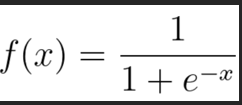


Donde x representa la siguinete función:

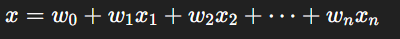


Esta fórmula indica que cada característica de entrada se multiplica por su peso correspondiente, y luego todos esos productos se suman. Aquí, w representa los pesos del modelo y x las entradas. Cada característica tiene un peso distinto porque el modelo aprende qué tan relevante es cada variable independiente para predecir la variable dependiente.

Una vez aplicada las 2 formulas sabremos que tan probable es que pertenezca a la clase, se compara el resultado con el umbral de desición para determinar si es o no de la clase

**Preprocesamiento**

---

Se realiza un análisis estadístico inicial de las variables y un gráfico de dispersión para observar la relación entre la edad y el salario estimado y como estos afectan a la variable dependiente.

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


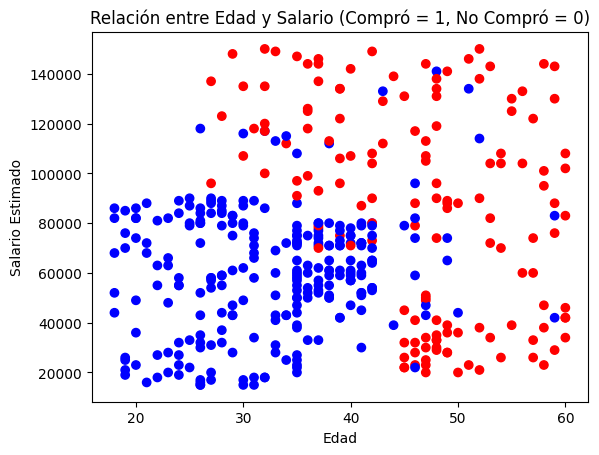

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar dataset
data = pd.read_csv("Social_Network_Ads.csv")

# Análisis estadístico básico
print(data.describe())  # Promedio, desviación estándar, valores mínimos y máximos

# Gráfico de dispersión
plt.scatter(data['Age'], data['EstimatedSalary'], c=data['Purchased'], cmap='bwr')
plt.xlabel("Edad")
plt.ylabel("Salario Estimado")
plt.title("Relación entre Edad y Salario (Compró = 1, No Compró = 0)")
plt.show()


En el grafico de dispersion los puntos rojos nos indica que el usuario compro, mientras los azules que no compro, como se puede observar los usuarios jóvenes con salarios bajos tienden a no comprar.

En cambio, los usuarios mayores con salarios altos tienen mayor probabilidad de comprar.

**1.3 Descripción de las librerias Pandas y scikit-learn:**


---



**Descripción de la librería pandas**

Pandas es una biblioteca de Python diseñada para la manipulación y análisis de datos. Permite trabajar con estructuras de datos como DataFrame, que funcionan como tablas con filas y columnas.

Ofrece herramientas para leer archivos (como CSV o Excel), seleccionar columnas, filtrar información y preparar los datos antes de aplicar modelos de Machine Learning.

En este programa, pandas se utiliza para cargar el dataset Social_Network_Ads.csv y extraer las columnas necesarias para el entrenamiento del perceptrón.



---


**Descripción de la librería scikit-learn**

Scikit-learn es una biblioteca de Python utilizada para crear y evaluar modelos de Machine Learning. Incluye herramientas para entrenar algoritmos, preprocesar datos y medir el rendimiento de los modelos.

En este programa, se usa para dividir los datos, normalizarlos, entrenar el perceptrón y evaluar su exactitud mediante sus distintos módulos (model_selection, preprocessing, linear_model, metrics).


---





In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

**Objetivo: Predecir con un algoritmo de regresión logistica si una persona compraria un producto despues de ver un anuncio en una red social, basandose en su edad y salario y en la información del dataset Social_Network_Add**

**Implementación del codigo**

Cargar el dataset que se va a usar e indicar las columas que se van a usar y la columna que se quiere predecir


In [3]:
data = pd.read_csv("Social_Network_Ads.csv")


X = data[["Age", "EstimatedSalary"]]
y = data["Purchased"]

Se dividen los datos en entrenamiento y en prueba, el test size indica cuanto porcentaje de los datos se va a tomar para la prueba en este caso 30%

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30
)

Escalar los datos

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Se crea y se entrena el modelo con los datos de entrenamiento que separamos anteriormente**

In [6]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

**Predicción**


In [7]:
def predecir_compra(edad, salario):
    # Crear el vector de entrada
    nuevo = [[edad, salario]]

    # Escalar con el mismo scaler usado en el entrenamiento
    nuevo_scaled = scaler.transform(nuevo)

    # Probabilidad de pertenecer a la clase 1
    prob = log_model.predict_proba(nuevo_scaled)[0][1]

    # Predicción final (0 o 1)
    clase = log_model.predict(nuevo_scaled)[0]

    # Imprimir resultados
    print(f"Probabilidad de que compre (clase 1): {prob*100:.2f}%")

    if clase == 1:
        print("→ Predicción: El usuario **comprará** el producto (clase 1).")
    else:
        print("→ Predicción: El usuario **NO comprará** el producto (clase 0).")


Usamos la funcion anterior para saber si una persona con edad de 45 años y salario de $70,000 compraria

In [17]:
predecir_compra(45, 70000)

Probabilidad de que compre (clase 1): 62.55%
→ Predicción: El usuario **comprará** el producto (clase 1).


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Evaluación del modelo**

---

Usamos los datos que separamos de prueba para evaluar nuestro modelo con una matriz de confusipon y calculando su acurrency

In [19]:
y_pred = log_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

print("Matriz de confusión:")
print(matriz)

Accuracy: 0.8666666666666667
Matriz de confusión:
[[79  5]
 [11 25]]


Con los datos de prueba el modelo acerto en un 86% de los casos, lo que nos indica que nuestro modelo esta un poco sobreajustado.

La matriz de confusión acerto 79 casos verdaderos positivos y 5 falsos positivos, lo que nos indica que el modelo es bueno prediciendo casos donde el usuario si compraria

**Referencias**

---



*   IBM. (2021, August 16). Regresión logística. Ibm.com. https://www.ibm.com/mx-es/think/topics/logistic-regression

*  ¿Qué es la regresión logística? - Explicación del modelo de regresión logística - AWS. (2022). Amazon Web Services, Inc. https://aws.amazon.com/es/what-is/logistic-regression/





